In [6]:
from raft_opt import raft_opt
import yaml
import os
import raft
import matplotlib.pyplot as plt
from calcuvate import calcuvate
import numpy as np
import openmdao.api as om
import pandas as pd

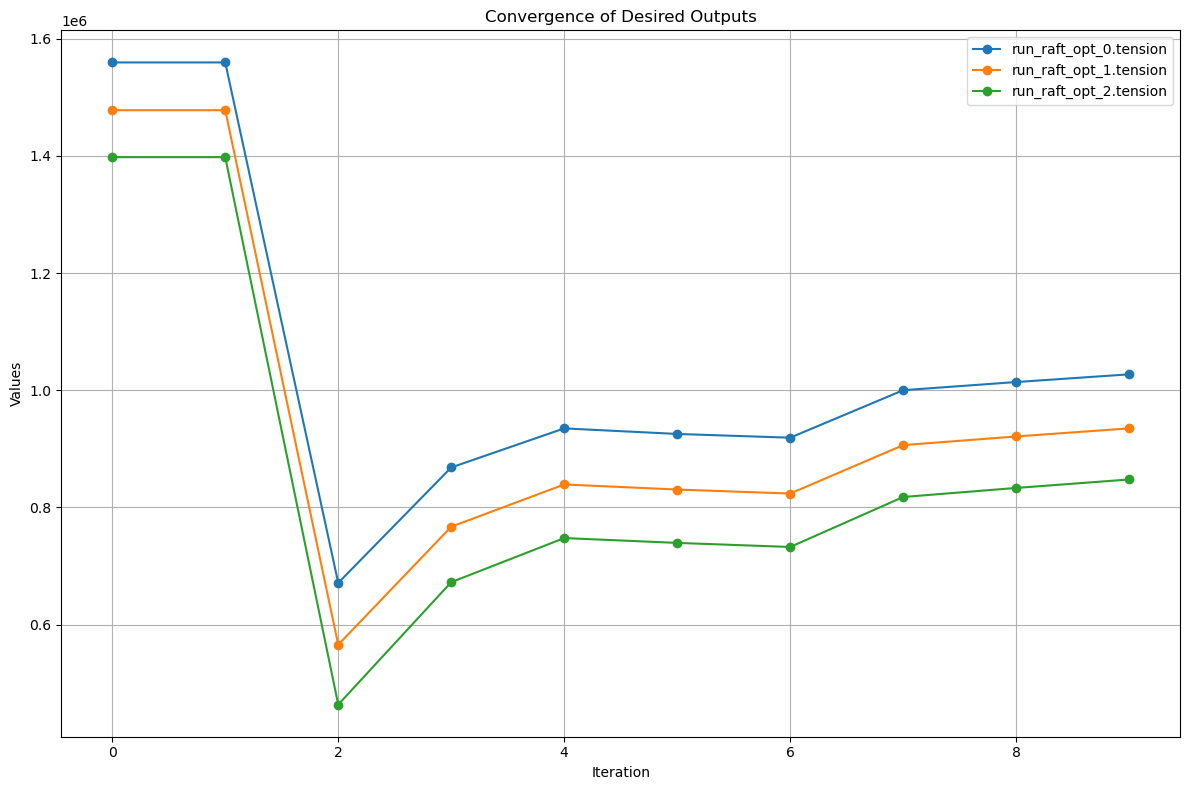

<Figure size 640x480 with 0 Axes>

In [ ]:
desired_outputs_tension = [
    
    "run_raft_opt_0.tension",
    
    "run_raft_opt_1.tension",
    
    "run_raft_opt_2.tension",
]

desired_outputs_mass = [
    "run_raft_opt_0.mass_fowt",
]

desired_outputs = [   "run_raft_opt_0.tension",
    
    "run_raft_opt_1.tension",
    
    "run_raft_opt_2.tension",
    
    "run_raft_opt_0.mass_fowt",]
# Read the CaseReader file
case_reader = om.CaseReader("multi_pt_final_1.sql")
driver_cases = case_reader.get_cases('driver', recurse=False)

# Initialize an empty dictionary to store results
data_dict = {var: [] for var in desired_outputs}
iterations = []

# Extract desired outputs
for i, case in enumerate(driver_cases):
    iterations.append(i)
    for var in desired_outputs:
        if var in case.outputs:
            data_dict[var].append(case.outputs[var])
        else:
            data_dict[var].append(None)

# Convert the collected data into a DataFrame
data_dict['Iteration'] = iterations
df = pd.DataFrame(data_dict)

# Plot the data
plt.figure(figsize=(12, 8))
for var in desired_outputs_tension:
    plt.plot(df['Iteration'], df[var], marker='o', linestyle='-', label=var)

plt.xlabel("Iteration")
plt.ylabel("Values")
plt.title("Convergence of Desired Outputs")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('tension')
plt.show()


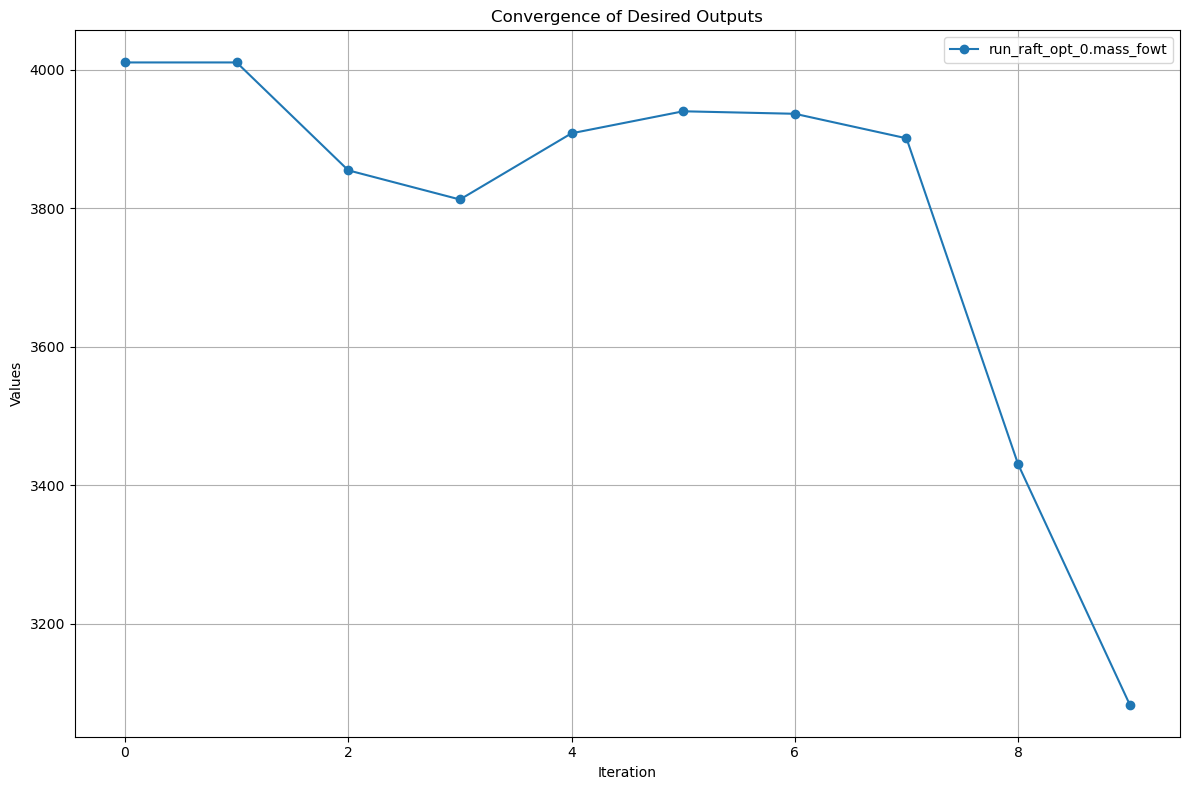

In [15]:
plt.figure(figsize=(12, 8))
for var in desired_outputs_mass:
    plt.plot(df['Iteration'], df[var], marker='o', linestyle='-', label=var)

plt.xlabel("Iteration")
plt.ylabel("Values")
plt.title("Convergence of Desired Outputs")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('mass.png')
plt.show()

In [19]:
design_variables = []
constraints = []
iter = []
for i, case in enumerate(driver_cases):
        iter.append(i)
        constraints.append(case.get_constraints())
        design_variables.append(case.get_design_vars())


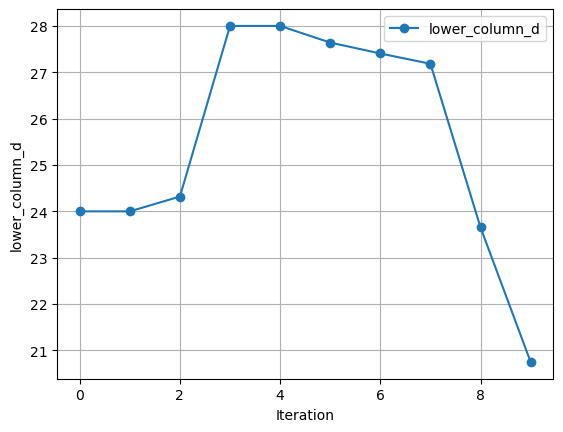

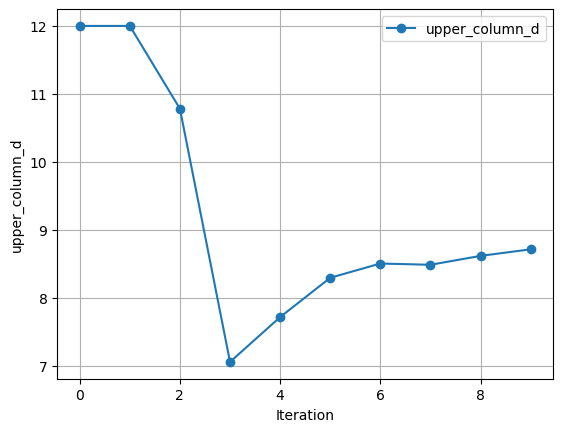

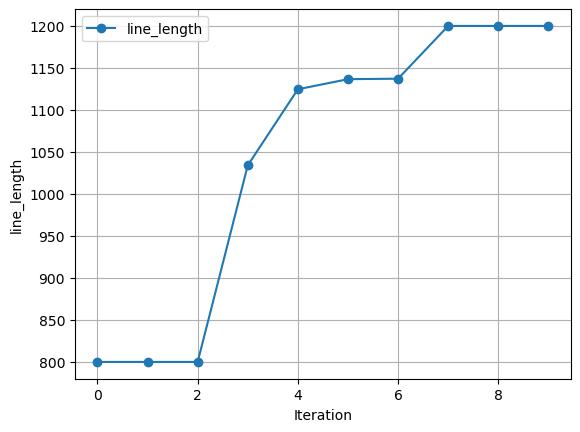

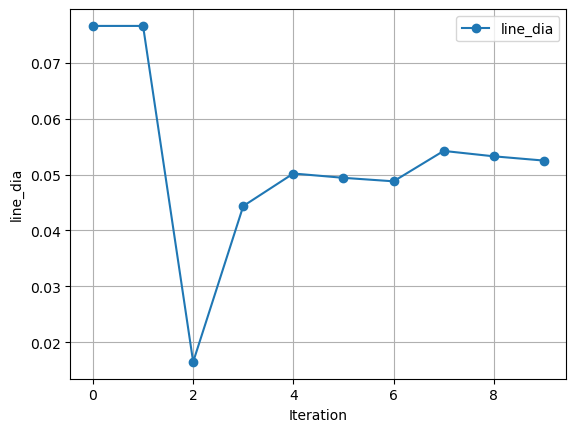

In [26]:
df = pd.DataFrame(design_variables)

# Plot each key-value pair
# plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.figure()
    plt.plot(df.index, df[column], label=column, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel(f"{column}")
    plt.legend()
    plt.grid()
    # plt.savefig(column)
    plt.show()